# Matrices - Basic of matrices

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# for null spaces
import scipy.linalg

# a pretty-looking matrix from scipy
from scipy.linalg import toeplitz


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

In [2]:
v = np.array([[1,2,3]]).T # col vector
w = np.array([[10,20]])   # row vector
v + w

array([[11, 21],
       [12, 22],
       [13, 23]])

## 4.1 Generation of a Matrix and Visualisation

### 4.1.1 Indexing and slicing

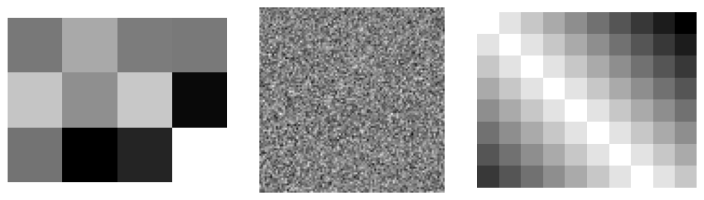

In [ ]:
# create some matrices
A = np.random.randn(3,4)
B = np.random.randn(100,100)
C = -toeplitz(np.arange(8),np.arange(10))


# and show them as images
fig,axs = plt.subplots(1,3,figsize=(10,3))

axs[0].imshow(A,cmap='gray')
axs[1].imshow(B,cmap='gray')
axs[2].imshow(C,cmap='gray')

for i in range(3): axs[i].axis('off')
plt.tight_layout()
plt.show()

# 각 행렬 원소의 수치는 색상에 대응된다.

In [5]:
# create a matrix
A = np.reshape(np.arange(1,10),(3,3))
print(A)
     

# get the n-th row

print( A[1,:] )

# note that to extract only one row, you don't need the column indices. 
print( A[1] )
# But that's potentially confusing, so I recommend avoiding that notation.
     

# get the n-th column
print( A[:,1] )
# Note that it prints out as a "row" even thought it's a column of the matrix
     

# multiple rows
A[0:2,:]
     

# multiple columns
A[:,1:]
     

## extracting a submatrix (multiple rows and cols)

# The goal here is to extract a submatrix from matrix A. Here's A:
# [[1 2 3]
#  [4 5 6]
#  [7 8 9]]

# And we want rows 0-1 and columns 0-1, thus:
# [[1 2]
#  [4 5]]


# seems like this should work...
print( A[0:2,1:2] )
print(' ')

# but this does (remember x:y:z slices from x to y-1 in steps of z)
print( A[0:2:1,0:2:1] )
     

# This cell has the example shown in the book.
     

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[4 5 6]
[4 5 6]
[2 5 8]
[[2]
 [5]]
 
[[1 2]
 [4 5]]


In [ ]:
# the full matrix
A = np.arange(60).reshape(6,10)

# a block of it
sub = A[1:4:1,0:5:1]


# print them out
print('Original matrix:\n')
print(A)

print('\n\nSubmatrix:\n') 
print(sub)

Original matrix:

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]]


Submatrix:

[[10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


### 4.1.2 Some special matrices

In [9]:
# random numbers matrix
Mrows = 4 # shape 0
Ncols = 6 
A = np.random.randn(Mrows, Ncols)
A


array([[-0.51717554, -0.27455117,  0.00182429, -1.76718616,  1.21896171,
         1.54063107],
       [ 1.02406259, -0.53184132, -0.46911403, -0.39614189, -0.82419008,
         0.70901547],
       [ 0.01352385, -1.13040014,  0.68240956, -0.4575792 ,  0.13550259,
         0.82691023],
       [ 0.47688379, -1.05705962, -0.09573423,  1.25867692, -0.36423138,
        -0.82479171]])

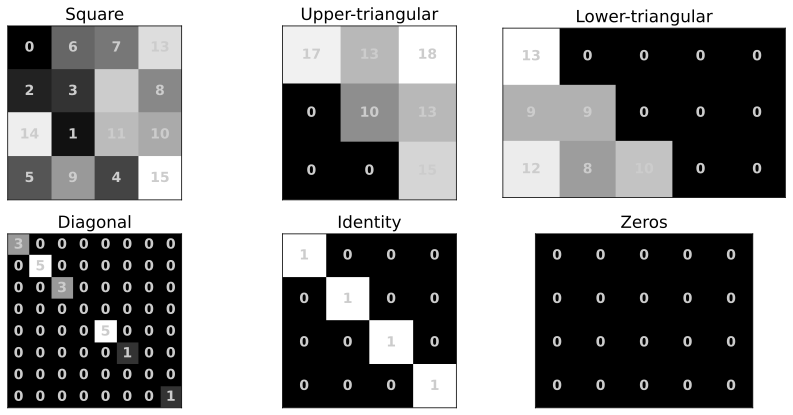

In [18]:
# square <-> nonsquare 
M1 = np.random.permutation(16).reshape(4,4)

# upper-triangular square
M2 = np.triu(np.random.randint(10,20,(3,3))) 

# lower-triangular rectangular
M3 = np.tril(np.random.randint(8,16,(3,5)))

# diagonal
M4 = np.diag( np.random.randint(0,6,size=8) )

# identity
M5 = np.eye(4,dtype=int)

# zeros
M6 = np.zeros((4, 5), dtype = int)

matrices  = [ M1,M2,M3,M4,M5,M6 ]
matLabels = [ 'Square','Upper-triangular','Lower-triangular','Diagonal','Identity','Zeros'  ]


_,axs = plt.subplots(2,3,figsize=(12,6))
axs = axs.flatten()

for mi,M in enumerate(matrices):
  axs[mi].imshow(M,cmap='gray',origin='upper',
                 vmin=np.min(M),vmax=np.max(M))
  axs[mi].set(xticks=[],yticks=[])
  axs[mi].set_title(matLabels[mi])
  
  # text labels
  for (j,i),num in np.ndenumerate(M):
    axs[mi].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontweight='bold')

plt.tight_layout()
plt.show()

## 4.2 Matrix Mathematics: Addition, Scalar Multiplication, Hadamard Product

### 4.2.1 Matrix addition

### 4.2.1 Shifting a matrix
- 대각에 상숫값을 더하는 것과 같이 단위 행렬에 스칼라를 곱해서 더하는 방식으로 이루어진다
- 두가지 중요한 응용 : 1) 행렬의 고윳값을 찾는 메커니즘 2) 모델을 데이터에 적합시킬 때. 행렬을 정규화하는 메커니즘

In [ ]:
# the matrix
A = np.array([ [4,5, 1],
               [0,1,11],
               [4,9, 7]  ])
# the scalar
s = 6

print('Original matrix:')
print(A), print(' ')

# as in the previous cell, this is broadcasting addition, not shifting (not linA)
print('Broadcasting addition:')
print(A + s), print(' ')

# This is shifting : 행렬의 이동!
print('Shifting:')
print( A + s*np.eye(len(A)) )

# 정확히 얼마나 이동해야하는지는 중요한 요소이다. 일반적으로 노름 또는 고윳값의 평균과 같은 행렬 자체로 정의될 수 있는 값의 일부로 스칼라를 정의함.

Original matrix:
[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]
 
Broadcasting addition:
[[10 11  7]
 [ 6  7 17]
 [10 15 13]]
 
Shifting:
[[10.  5.  1.]
 [ 0.  7. 11.]
 [ 4.  9. 13.]]


### 4.2.3 Scalar multiplication & the Hadamard Product(mul of elements)

In [ ]:
# two random matrices
A = np.random.randn(3,4)
B = np.random.randn(3,4)

# this is Hadamard multiplication
A*B 

# and so is this
np.multiply(A,B)

#########################################

# this one is NOT Hadamard multiplication
A@B

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

## 4.3. "Standard" matrix multiplication
- 곱셈 행렬의 (i, j) 번째 원소가 왼쪽 행렬이 i번째 행과 오른쪽 j번째 열 사이의 내적이기 때문에
- 행렬 곱셈의 결과는 왼쪽 행렬의 행과 오른쪽 행렬의 열 사이의 모든 쌍에 대한 선형 관계를 저장하는 행렬이 된다.
    - 공분산, 상관 행렬, 일반 성형 모델, 특잇값 분해 등 수많은 응용의 기초가 된다

In [24]:
# Create a few matrices
A = np.random.randn(3,6)
B = np.random.randn(6,4)
C = np.random.randn(6,4)

# try some multiplications, and print out the shape of the product matrix
print( (A@B).shape )
print( np.dot(A,B).shape ) # same as above
#print( (B@C).shape ) # impossible
print( (A@C).shape )

(3, 4)
(3, 4)
(3, 4)


In [34]:
# Note/reminder:

# This is Hadamard (element-wise) multiplication:
print( np.multiply(B,C) ), print(' ') # 6 * 4

# This is matrix multiplication
print( np.dot(B,C.T) )   # 6 * 6

# demonstration:
# np.dot(B,C.T)-B@C.T

[[ 0.09769439 -0.05721567  2.46082483  0.04682184]
 [ 3.0423963   0.2649915   0.0877531  -0.22290197]
 [-0.79049026 -0.2606449   0.10812716 -0.42869525]
 [ 0.09459339  0.58424917  0.72473374  0.11738545]
 [ 0.45350772 -0.72536003 -0.04919178  0.14589854]
 [ 0.26869616  0.02034244  0.07772623  0.05287098]]
 
[[ 2.54812539  1.4235837  -1.58631134 -1.64608246  1.72679616  0.69821904]
 [ 0.50713433  3.17223893  1.4328193   0.26995033  2.25474133  0.82357372]
 [ 0.271576   -2.67748287 -1.37170325  0.92546532 -1.2150466  -0.39636386]
 [ 0.17638855 -0.46838566  1.22077943  1.52096176 -1.10589196  0.17482935]
 [ 0.77924584  0.06275635  0.3304696   0.62321401 -0.17514554  0.29935081]
 [ 0.88650286  1.00109348  0.48234486 -0.24850211  0.22101748  0.4196358 ]]


In [33]:
np.dot(B,C.T)-B@C.T

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

### 4.3.3 Matrix - vetor multiplication
- ⭐️ 행렬 - 벡터 곱셈의 결과는 항상 벡터이다 : 행벡터를 앞에서 곱하면 다른 행백터가 생성되지만, 행렬에 열백터를 뒤에서 곱하면 다른 열벡터가 생성된다
- 행렬 벡터 곱셈은 행렬 공간의 기저이다
- ⭐️ 해당 벡터를 회전하고 확장할 수 있는 역할을 하며, 행렬은 이러한 변환을 담는 그릇이다

In [ ]:
# 선형 가중 결합
# 스칼라-벡터 곱셈을 행렬-벡터 곱셍ㅁ으로 나타내기 

# Geometry of matrix-vector multiplication

# some matrix 
M = np.array( [ [2,3], [2,1]] )
x = np.array( [ [1, 1.5] ]).T # np.array([ [1], [1.5] ])
Mx = M@x

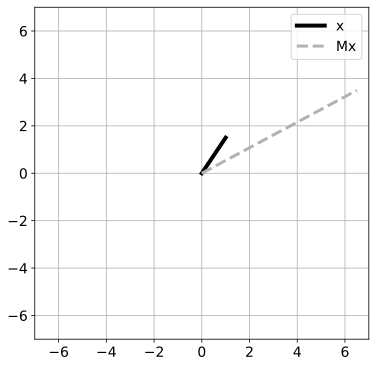

In [ ]:
# 행렬- 벡터 곱셉은 해당벡터를 회전시키고 크기를 조정할 수 있다.
plt.figure(figsize=(6,6))

plt.plot([0,x[0,0]],[0,x[1,0]],'k',linewidth=4,label='x')
plt.plot([0,Mx[0,0]],[0,Mx[1,0]],'--',linewidth=3,color=[.7,.7,.7],label='Mx')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
plt.show()

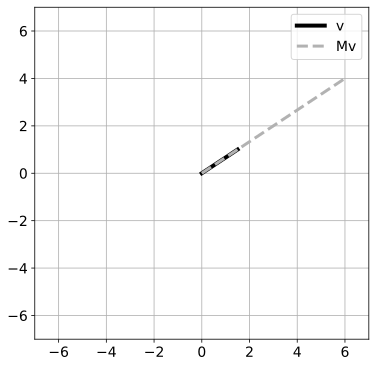

In [ ]:
# ⭐️ 행렬 벡터 곱이 다른방향으로 회전되지 않았음. 크기는 바뀌었으나 방향은 유지됨
# 행렬-벡터 곱이 마치 스칼라-벡터 곱셈(크기를 조정할수는 이있으나, 회전은 못시킴) 인것처럼 동작
# 벡터 v는 행렬 M의 고유 벡터이며, M이 v를 키운 양은 행렬의 고윳값이다.

'''⭐️ The matrix–vector multiplication does not rotate the vector in a different direction. 
The magnitude changes, but the direction is preserved.  
Matrix–vector multiplication works as if it were scalar–vector multiplication.  
The vector v is an eigenvector of the matrix M, and the amount by which M scales v is the eigenvalue of the matrix.'''

# some matrix
M  = np.array([ [2,3],[2,1] ])
v  = np.array([ [1.5,1] ]).T # transposed into a column vector
Mv = M@v


plt.figure(figsize=(6,6))

plt.plot([0,v[0,0]],[0,v[1,0]],'k',linewidth=4,label='v')
plt.plot([0,Mv[0,0]],[0,Mv[1,0]],'--',linewidth=3,color=[.7,.7,.7],label='Mv')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
plt.show()

### 4.4 Transpose

In [ ]:
# A matrix to transpose
A = np.array([ [3,4,5],[1,2,3] ])

A_T1 = A.T # as method
A_T2 = np.transpose(A) # as function

# double-transpose
A_TT = A_T1.T 

# print them
print( A_T1 ), print(' ')
print( A_T2 ), print(' ')
print( A_TT )
     

[[3 1]
 [4 2]
 [5 3]]
 
[[3 1]
 [4 2]
 [5 3]]
 
[[3 4 5]
 [1 2 3]]


## 4.6 Symmetric matrix

### 4.6.1. 비대칭 행렬로부터 대칭행렬 생성하기
- 어떤 행렬이든 (비정방, 비대칭 행렬이라도) 자신의 전치를 곱하면 정방 전치 행렬이 된다